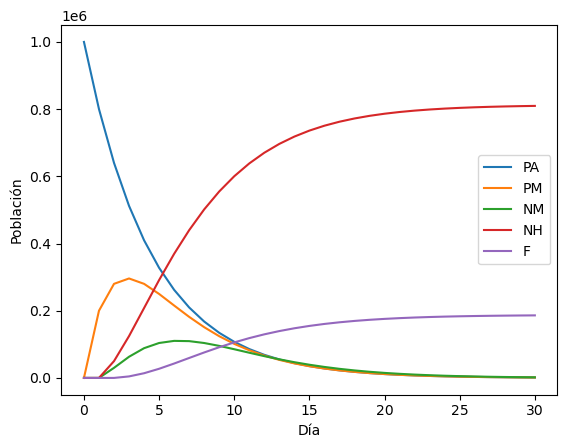

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir los estados
estados = ["PA", "PM", "NM", "NH", "F"]

# Tasas de crecimiento
sl = 0.20
lg = 0.15
lr = 0.25
gr = 0.15
gf = 0.15

# Definimos la matriz de transición
A = np.array([
    [1-sl, 0, 0, 0, 0],
    [sl, 1-lr-lg, 0, 0, 0],
    [0, lg, 1-gr-gf, 0, 0],
    [0, lr, gr, 1, 0],
    [0, 0, gf, 0, 1]
])

# Convertir a DataFrame
df_transicion = pd.DataFrame(A, columns=estados, index=estados)

# Población inicial
poblacion_inicial = 1000000

# Vector de inversiones al día 0
tasa_crecimiento_pa = 1 - sl
tasa_crecimiento_pm = 1 - (lr + lg)
tasa_crecimiento_nm = 1 - (gr + gf)
tasa_crecimiento_nh = 1
tasa_crecimiento_f = 1

x_0 = np.array([
    poblacion_inicial * tasa_crecimiento_pa,
    poblacion_inicial * tasa_crecimiento_pm,
    poblacion_inicial * tasa_crecimiento_nm,
    poblacion_inicial * tasa_crecimiento_nh,
    poblacion_inicial * tasa_crecimiento_f
])

# Número de días
dias = 30

# Vector para almacenar la evolución de las inversiones
x = np.zeros((dias+1, len(estados)))

# Población inicial
x[0, 0] = poblacion_inicial

# Simulación para cada día
for i in range(1, dias+1):
    x[i] = np.dot(A, x[i-1])
# Crear un DataFrame con la evolución de las inversiones
df_evolucion = pd.DataFrame(x, columns=estados)

# Graficar la evolución de las inversiones
for estado in estados:
    plt.plot(df_evolucion[estado], label=estado)

plt.xlabel("Día")
plt.ylabel("Numero de personas")
plt.legend()
plt.show()